# Pymaceuticals Inc.
---

### Analysis

Pymaceuticals, Inc. is a new pharmaceutical company focused on developing anti-cancer medications. They recently conducted a study on potential treatments for squamous cell carcinoma (SEC) using 249 mice with SEC tumors. The study lasted for 45 days during which the mice were treated with various drugs and the size of their tumors was recorded.

- The analysis revealed that tumor size is highly correlated with mouse weight, and if this was not a standard process in the original study, mouse weight should be randomized between drugs to avoid biasing results.
- Additionally, two drugs, Capomulin and Ramicane, demonstrated significantly higher effect sizes than other treatments, with a mean tumor volume of around 35 mm3 compared to 60 mm3 for other treatments
 

In [133]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse=pd.merge(study_results,mouse_metadata, how="left",on="Mouse ID")

# Display the data table for preview
combined_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [134]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [135]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [136]:
# Checking the number of mice.
n=len(pd.unique(combined_mouse["Mouse ID"]))
n

249

In [137]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows=combined_mouse[combined_mouse.duplicated(["Mouse ID","Timepoint"])]
print(duplicate_rows['Mouse ID'])

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object


In [138]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse=combined_mouse[combined_mouse["Mouse ID"] =="g989"]
duplicate_mouse.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [139]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_combined_mouse=combined_mouse[combined_mouse["Mouse ID"] != "g989"]
cleaned_combined_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [140]:
# Checking the number of mice in the clean DataFrame.
n1=len(pd.unique(cleaned_combined_mouse["Mouse ID"]))
n1

248

## Summary Statistics

In [141]:
import numpy as np
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary=pd.DataFrame(cleaned_combined_mouse)

# print the summary statistics table
summary

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summary_stats = summary.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([np.mean, np.median, np.var, np.std, 'sem'])
new_names={'mean':'Mean Tumor Volume',
           'median':'Median Tumor Volume',
             'var':'Tumor Volume Variance',
             'std':'Tumor Volume Std. Dev.',
             'sem':'Tumor Volume Std. Err.'}
summary_stats=summary_stats.rename(columns=new_names)

# Assemble the resulting series into a single summary DataFrame.

summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [142]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats_1 = summary.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_stats_1

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

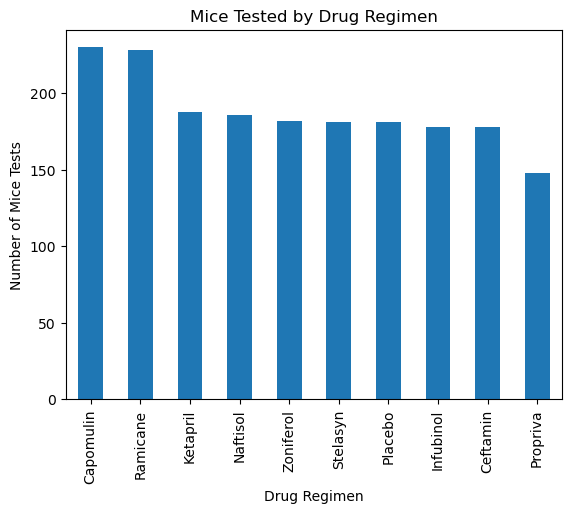

In [143]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints=cleaned_combined_mouse["Drug Regimen"].value_counts()

ax=timepoints.plot(kind="bar")

ax.set_title("Mice Tested by Drug Regimen")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Number of Mice Tests")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()


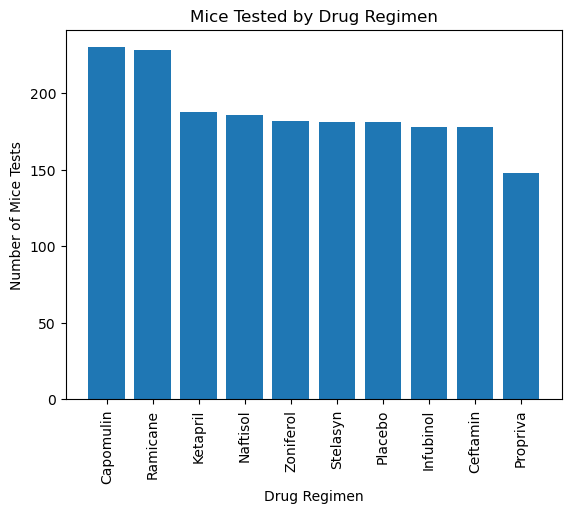

In [144]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
timepoints=cleaned_combined_mouse["Drug Regimen"].value_counts()

plt.bar(timepoints.index, timepoints.values)
plt.title("Mice Tested by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tests")
plt.xticks(rotation=90)
plt.show()


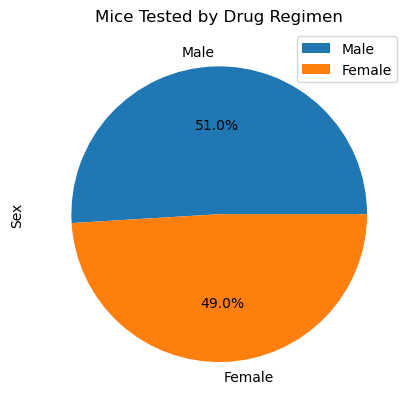

In [145]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
timepoints=cleaned_combined_mouse["Sex"].value_counts()

ax = timepoints.plot(kind="pie", autopct='%1.1f%%')

ax.set_title("Mice Tested by Drug Regimen")
ax.legend()


plt.show()


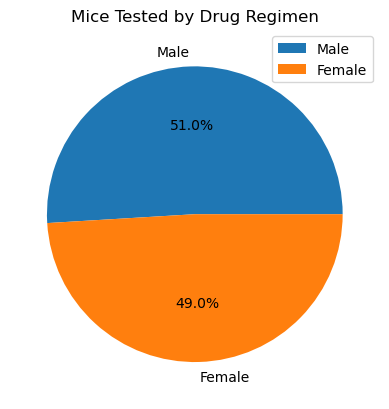

In [146]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
timepoints=cleaned_combined_mouse["Sex"].value_counts()

plt.pie(timepoints.values, labels=timepoints.index, autopct='%1.1f%%')
plt.title("Mice Tested by Drug Regimen")
plt.legend()
plt.show()


## Quartiles, Outliers and Boxplots

In [147]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cleaner_mouse_data=cleaned_combined_mouse[cleaned_combined_mouse["Drug Regimen"].isin(['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']) == True]
# Start by getting the last (greatest) timepoint for each mouse
max_timepoints=cleaner_mouse_data.groupby(['Mouse ID'])['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
cleaner_mouse_data=pd.merge(cleaner_mouse_data,max_timepoints,how="right",on=["Mouse ID","Timepoint"])
cleaner_mouse_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [148]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for name in treatment_list:
    subset = cleaner_mouse_data[cleaner_mouse_data['Drug Regimen'] == name]
    volumes = subset['Tumor Volume (mm3)']
    
    q1 = volumes.quantile(0.25)
    q3 = volumes.quantile(0.75)
    iqr = q3 - q1
    
    tumor_list.append(volumes)
    
    # Determine outliers using upper and lower bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = volumes.loc[(volumes < lower_bound) | (volumes > upper_bound)]
    
    print(f"Drug Regimen: {name}")
    if len(outliers) > 0:
        print(f"Outliers: {outliers}")
    else:
        print("No outliers")
    print(f"Q1={q1:.2f}, Q3={q3:.2f}, IQR={iqr:.2f}") 


Drug Regimen: Capomulin
No outliers
Q1=32.38, Q3=40.16, IQR=7.78
Drug Regimen: Ramicane
No outliers
Q1=31.56, Q3=40.66, IQR=9.10
Drug Regimen: Infubinol
Outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Q1=54.05, Q3=65.53, IQR=11.48
Drug Regimen: Ceftamin
No outliers
Q1=48.72, Q3=64.30, IQR=15.58


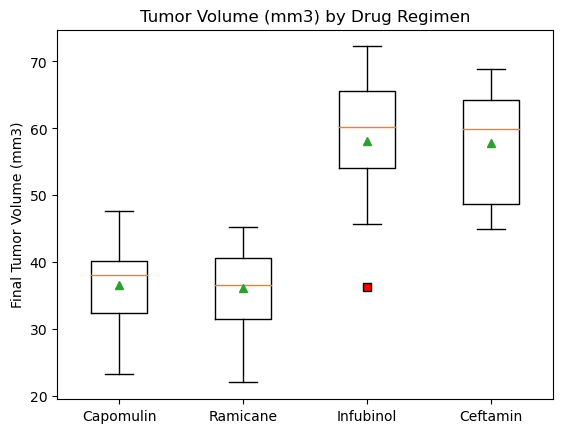

In [149]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_list, labels=treatment_list, showmeans=True, flierprops=dict(markerfacecolor='red', marker='s'))
plt.title("Tumor Volume (mm3) by Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [150]:
campomulin

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [151]:
#Filter out non-Capolulin into new dataframe
capomulin=cleaned_combined_mouse.loc[cleaned_combined_mouse["Drug Regimen"]=="Capomulin"]
capomulin_df = capomulin.set_index("Mouse ID")
capomulin_df.index.values



array(['b128', 'j246', 'r554', 's185', 'b742', 'x401', 'l509', 's710',
       'r157', 'u364', 'j119', 'v923', 'w914', 'i738', 'r944', 'y793',
       'g316', 'g288', 'l897', 'w150', 't565', 'i557', 'm957', 'f966',
       'm601', 'l509', 'l897', 'w150', 's710', 'w914', 'm601', 'u364',
       'b742', 'v923', 'f966', 'x401', 'j119', 'i557', 'y793', 'g316',
       'r157', 'r944', 'r554', 's185', 'i738', 'j246', 't565', 'b128',
       'g288', 'm957', 'r554', 'u364', 'v923', 'g288', 's710', 'l509',
       'i738', 'm957', 'j119', 'i557', 'g316', 'y793', 'f966', 'm601',
       'l897', 'r944', 'w914', 'w150', 't565', 's185', 'b128', 'b742',
       'x401', 'j246', 'r157', 's185', 'b128', 'g288', 'i738', 'm957',
       'r944', 'y793', 't565', 'j246', 'r157', 'g316', 'r554', 'j119',
       'b742', 'x401', 'i557', 'u364', 'l897', 'm601', 'w914', 's710',
       'l509', 'f966', 'v923', 'u364', 'f966', 'b128', 'b742', 'r554',
       'm957', 's185', 'l509', 'w914', 'l897', 'r944', 'j119', 'g316',
      

In [152]:
mouse_id='s710'

tumor_vol= capomulin_df.loc[mouse_id,['Tumor Volume (mm3)']]
timepoint= capomulin_df.loc[mouse_id,['Timepoint']]

Text(0.5, 1.0, 'Tumor Volume Over Time for Mouse s710')

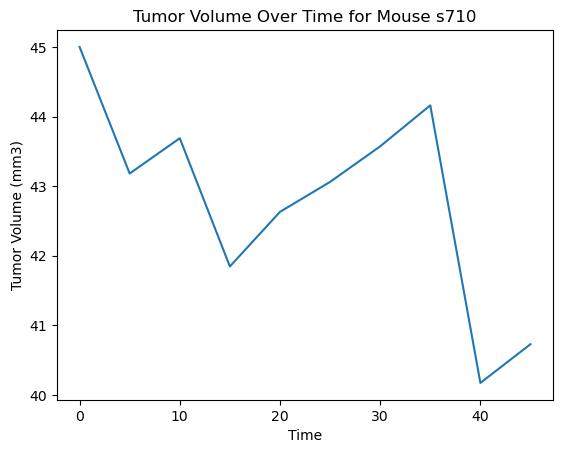

In [153]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plt.plot(timepoint,tumor_vol)
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f'Tumor Volume Over Time for Mouse {mouse_id}')

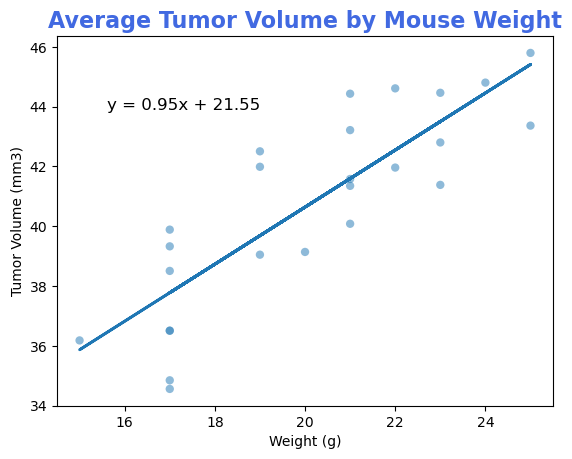

In [154]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
from sklearn.metrics import r2_score
fig, ax = plt.subplots()

data_x = capomulin.groupby('Mouse ID').mean()['Weight (g)']
data_y = capomulin.groupby('Mouse ID').mean()['Tumor Volume (mm3)']

for color in ['tab:blue']:
    ax.scatter(data_x, data_y, c=color, label="Set 1",
               alpha=0.5, edgecolors='none')
    
    # Fit a linear trendline to the data
    z = np.polyfit(data_x, data_y, 1)
    p = np.poly1d(z)
    ax.plot(data_x, p(data_x), c=color, linewidth=2)

    # Add the y=mx+b equation to the plot
    equation = f"y = {z[0]:.2f}x + {z[1]:.2f}"
    ax.text(0.1, 0.8, equation, transform=ax.transAxes, fontsize=12)


ax.set_xlabel("Weight (g)",color='k')
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Average Tumor Volume by Mouse Weight", fontdict={'fontsize':16,'fontweight':'bold','color':'royalblue'})


plt.show()



## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


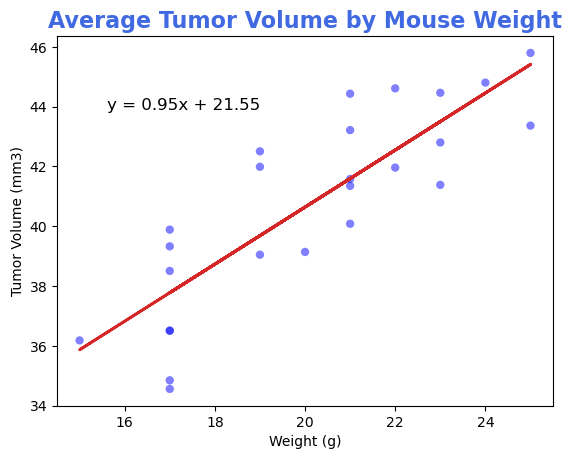

In [155]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(data_y, data_x)
print(f'The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}')

fig, ax = plt.subplots()

for color in ['tab:red']:
    ax.scatter(data_x, data_y, c='blue', label="Set 1",
               alpha=0.5, edgecolors='none')
    
    # Fit a linear trendline to the data
    z = np.polyfit(data_x, data_y, 1)
    p = np.poly1d(z)
    ax.plot(data_x, p(data_x), c=color, linewidth=2)


    # Add the y=mx+b equation to the plot
    equation = f"y = {z[0]:.2f}x + {z[1]:.2f}"
    ax.text(0.1, 0.8, equation, transform=ax.transAxes, fontsize=12)


ax.set_xlabel("Weight (g)",color='k')
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Average Tumor Volume by Mouse Weight", fontdict={'fontsize':16,'fontweight':'bold','color':'royalblue'})


plt.show()


